In [ ]:
!pip install git+https://github.com/rcmalli/keras-squeezenet.git

In [ ]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.3 MB 47 kB/s 
     |████████████████████████████████| 50 kB 8.0 MB/s 
     |████████████████████████████████| 488 kB 66.0 MB/s 
     |████████████████████████████████| 3.1 MB 57.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
      Successfully uninstalled tensorflow-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you

In [ ]:
!pip install q keras==2.1.1

     |████████████████████████████████| 302 kB 29.4 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [ ]:
pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 30.5 MB/s 
     |████████████████████████████████| 15.7 MB 28.1 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.14.0 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatib

In [ ]:
from keras_squeezenet import SqueezeNet

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [ ]:
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.layers import Activation, Dropout, Convolution2D, GlobalAveragePooling2D
from keras.models import Sequential

In [ ]:
from scipy import ndimage

In [ ]:
import cv2
import numpy as np
import os

In [ ]:
training_img_folder = '/content/drive/MyDrive/Hand Gesture Recognition/training_images'

# Assign numbers to each of the categories.
CATEGORY_MAP = {
    "withdraw": 0,
    "bal_check": 1,
    "pin_change": 2,
    "cardless_withdrawl": 3
}

# Loading the input training images
input_data = []
for sub_folder_name in os.listdir(training_img_folder):
    path = os.path.join(training_img_folder, sub_folder_name)
    for fileName in os.listdir(path):
        if fileName.endswith(".jpg"):
            img = cv2.imread(os.path.join(path, fileName))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (225, 225))

            #img = ndimage.rotate(img, 20)
            #'input_data' stores the input image array and its corresponding label or category name
            input_data.append([img, sub_folder_name])

# Zip function to separate the 'img_data'(input image) & 'labels' (output text labels)
img_data, labels = zip(*input_data)

def label_mapper(val):
    return CATEGORY_MAP[val]

labels = list(map(label_mapper, labels))

labels = np_utils.to_categorical(labels)

In [ ]:
labels.shape

(400, 4)

In [ ]:
def def_model_param():
    GESTURE_CATEGORIES = len(CATEGORY_MAP)
    base_model = Sequential([
    SqueezeNet(input_shape=(225, 225, 3), include_top=False),Dropout(0.5),
    Convolution2D(GESTURE_CATEGORIES, (1, 1), padding='valid'),
    Activation('relu'),
    GlobalAveragePooling2D(),
    Activation('softmax')])
    return base_model


In [ ]:
model = def_model_param()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model.compile(
    optimizer=Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [ ]:
# fit model
model.fit(np.array(img_data), np.array(labels), epochs=15)

print("Training Completed")

In [ ]:
model.save("gesture_model_v1.h5")

In [ ]:
import keras
import tensorflow as tf

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
thumb = cv2.imread('Thumbsup.jpg')
thumb = cv2.cvtColor(thumb, cv2.COLOR_BGR2RGB)
thumb = cv2.resize(thumb, (225, 225))

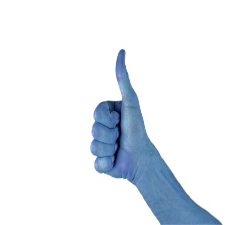

Class =  2


In [ ]:
cv2_imshow(thumb)
print("Class = ",np.argmax(model.predict(np.array([thumb]))))

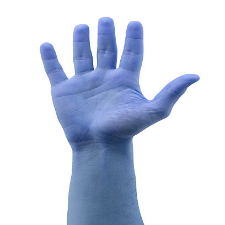

Class =  3


In [ ]:
from keras.models import load_model
import cv2
import numpy as np
model = load_model("/content/gesture_model_v1.h5")


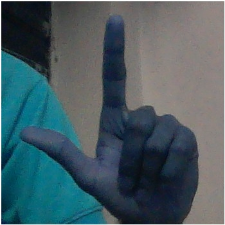

Class =  3


In [ ]:
img = cv2.imread('22.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (225, 225))
cv2_imshow(img)
print("Class = ",np.argmax(model.predict(np.array([img]))))

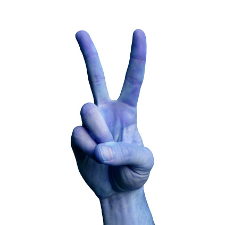

Class =  2


In [ ]:
img1 = cv2.imread('victory.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1, (225, 225))
cv2_imshow(img1)
print("Class = ",np.argmax(model.predict(np.array([img1]))))

In [ ]:
model.predict(np.array([img]))

array([[1.1510705e-04, 5.7960965e-02, 1.0415576e-03, 9.4088238e-01]],
      dtype=float32)

In [ ]:
model.predict_classes(np.array([img]))

array([3])

In [ ]:
img1 = cv2.imread('1.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1, (225, 225))
model.predict_classes(np.array([img1]))

array([3])

In [ ]:
model.predict(np.array([img1]))

array([[1.7144188e-07, 7.7806511e-10, 9.9999988e-01, 1.4118295e-08]],
      dtype=float32)

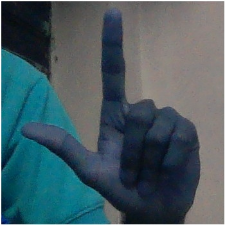

In [ ]:
cv2_imshow(img1)

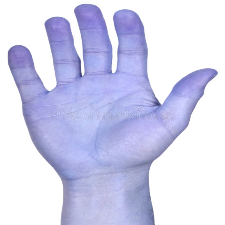

In [ ]:
cv2_imshow(img)

In [ ]:
ls = list(img_data)

In [ ]:
input_data

In [ ]:
labels

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [ ]:
#Class 0 - Palm - Withdrawl
#class 1 - Bal Check - Thumbsup
#Class 2 - Pin change - Victory Sign
#Class 3 - Cardless_Withdraw - index and thumb

In [ ]:
V = 6

def selectMinVertex(value,setMST):
  minimum = 2147483647
  vertex = 0
  for i in range(V):
    if(setMST[i] == False and value[i]<minimum):
      vertex = i
      minimum = value[i]
  return vertex

def findMST(graph):
  parent = []
  value = [2147483647]*V
  setMST = [False]*V

  parent[0] = -1
  value[0] = 0

  for i in range(V-1):
    U = selectMinVertex(value,setMST)
    setMST[U] = True

    for j in range(V):
      if(graph[U][j]!=0 and setMST[j]==False and graph[U][j]<value[j]):
        value[j] = graph[U][j]
        parent[j] = U

  for i in range(1,V):
    print("U->V: "+str(parent[i])+"->"+str(i)+" wt = "+str(graph[parent[i]][i])+"\n")


In [ ]:
verts = [False]*6

In [ ]:
verts

[False, False, False, False, False, False]